HA PHUNG

 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Thursday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [93]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df


,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026
...,...,...,...,...,...,...
295,-0.081570,1.529248,0.686483,1.717089,-0.804277,343.244347
296,0.300254,-0.429596,0.805913,-0.219552,-0.251852,20.913333
297,-1.326490,0.308204,1.115489,1.008196,-3.016032,-8.753043
298,-1.619646,2.005141,-0.187626,-0.148941,1.165335,182.614426


In [95]:
# Your code here. Add cells as needed.
x_columns = column_names

X = reg_df[x_columns]
y = reg_df['y']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)



# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R^2 and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'R^2: {r2}')
print(f'MSE: {mse}')

R^2: 0.966532725340359
MSE: 919.6610372814516


In [96]:
# The model parameters can be obtained using the `coef_` and `intercept_` attributes of the fitted model.

# Get the model parameters
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept (bias): {intercept}')

Coefficients: [43.96162184 78.68330668 89.90061774 86.51604654 68.34523989]
Intercept (bias): 32.73554835281896


#### Your written answers here

What are your model parameters?
 - Coefficients: [43.96162184 78.68330668 89.90061774 86.51604654 68.34523989]
 - Intercept (bias): 32.73554835281896

What were your MSE and R^2?
 - R^2: 0.966532725340359
 - MSE: 919.6610372814516

## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [97]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.007315,0.019679,-0.021250,-0.104704,0.024364,0.017516,-0.055686,-0.030241,0.034656,-0.068220,11.024821
1,-0.005907,-0.016114,-0.030258,-0.069527,-0.030260,-0.003122,-0.073716,-0.042138,-0.044862,-0.088413,26.768245
2,0.034912,0.022882,0.055374,0.004005,-0.003374,-0.010581,0.082788,0.037517,-0.003320,0.000055,74.843172
3,-0.037772,0.014265,-0.064396,0.018594,-0.033567,0.000601,0.010608,0.035124,-0.002234,-0.010405,17.916094
4,0.040552,-0.035211,-0.023375,-0.024265,-0.039836,-0.001579,-0.038636,0.022221,-0.043877,0.050826,42.288164
...,...,...,...,...,...,...,...,...,...,...,...
295,-0.003048,-0.012778,-0.027216,0.031704,-0.084934,-0.041188,-0.021073,-0.044629,-0.076264,-0.021814,-3.417642
296,0.007356,0.010974,-0.001972,-0.041844,0.014359,0.005986,-0.020905,0.029846,0.003773,-0.010404,-0.392983
297,0.084358,-0.042124,0.025305,0.004588,0.056307,-0.004906,-0.028724,-0.025042,0.054304,0.035701,69.303731
298,-0.018910,0.020567,-0.005862,0.009466,-0.020524,0.036581,0.040956,0.031080,-0.016986,0.046116,30.670278


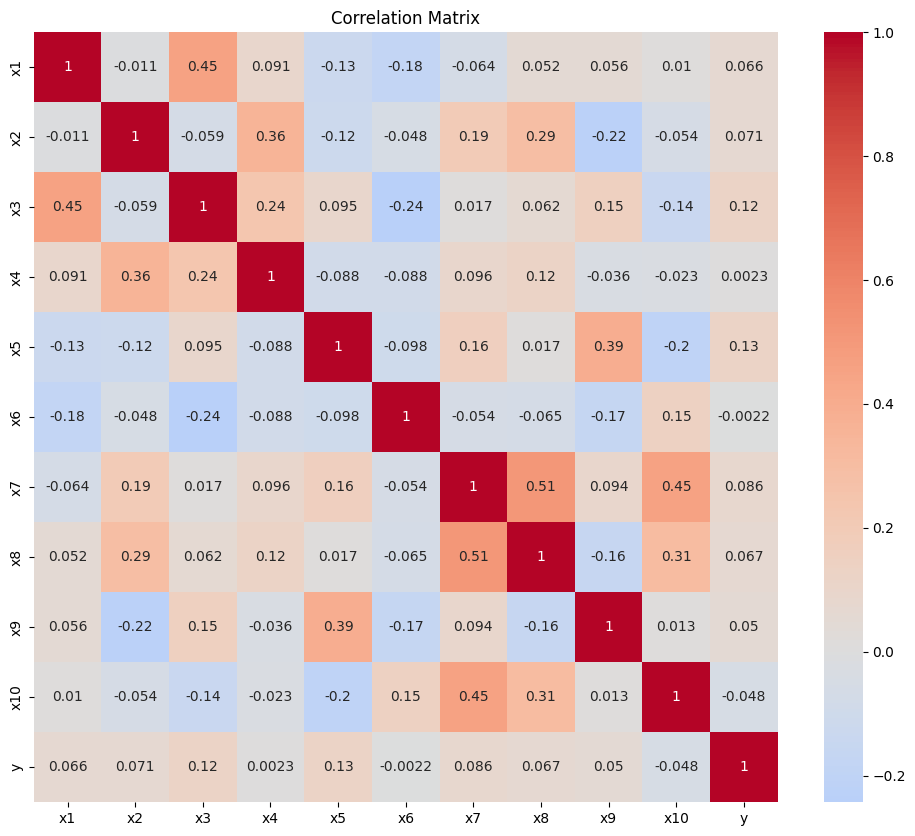

R^2: 0.047585535365692766
MSE: 945.9040265298196

Model Coefficients:
  Feature  Coefficient
0      x1    47.996332
1      x2    69.811476
2      x3    84.999856
3      x4   -47.403990
4      x5    78.337830
5      x6    62.543539
6      x7    53.407499
7      x8    18.603508
8      x9    10.320773
9     x10   -45.871201


In [98]:
# ## Problem 2 - Trial 1

# Multiple Regression with Synthetic Data and Co-linearity

#  - Show the correlation matrix for the 10 variables and the target variable.
#  - Fit a linear regression model to the following synthetic data.
#  - Calculate R^2 and MSE for your best fit model.
# Print the correlation matrix for the 10 features and the target variable
# Create correlation matrix
correlation_matrix = reg2_df.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Fit linear regression model
model2 = LinearRegression()
X2 = reg2_df[column_names]  # using all x variables
y2 = reg2_df['y']
model2.fit(X2, y2)

# Make predictions
y2_pred = model2.predict(X2)

# Calculate R^2 and MSE
r2_2 = r2_score(y2, y2_pred)
mse_2 = mean_squared_error(y2, y2_pred)

print(f'R^2: {r2_2}')
print(f'MSE: {mse_2}')

# Print coefficients
coefficients = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': model2.coef_
})
print('\nModel Coefficients:')
print(coefficients)

In [99]:
# ## Problem 2 - Trial 2
# Multiple Regression with Synthetic Data and Co-linearity

#  - Show the correlation matrix for the 10 variables and the target variable.
#  - Fit a linear regression model to the following synthetic data.
#  - Calculate R^2 and MSE for your best fit model.
# Print the correlation matrix for the 10 features and the target variable
correlation_matrix = reg2_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Prepare the feature matrix and target vector
X2 = reg2_df[column_names]
y2 = reg2_df['y']

# Fit the linear regression model
model2 = LinearRegression()
model2.fit(X2, y2)

# Predict the target
y2_pred = model2.predict(X2)

# Calculate R^2 and MSE
r2_2 = r2_score(y2, y2_pred)
mse_2 = mean_squared_error(y2, y2_pred)

print(f'R^2: {r2_2}')
print(f'MSE: {mse_2}')

Correlation Matrix:
           x1        x2        x3        x4        x5        x6        x7  \
x1   1.000000 -0.011150  0.454065  0.090717 -0.125919 -0.175474 -0.063773   
x2  -0.011150  1.000000 -0.058716  0.357967 -0.118967 -0.048005  0.194140   
x3   0.454065 -0.058716  1.000000  0.240501  0.094686 -0.243099  0.017109   
x4   0.090717  0.357967  0.240501  1.000000 -0.088106 -0.087957  0.095691   
x5  -0.125919 -0.118967  0.094686 -0.088106  1.000000 -0.097737  0.155836   
x6  -0.175474 -0.048005 -0.243099 -0.087957 -0.097737  1.000000 -0.054299   
x7  -0.063773  0.194140  0.017109  0.095691  0.155836 -0.054299  1.000000   
x8   0.052289  0.294679  0.062238  0.120049  0.016721 -0.064886  0.512798   
x9   0.056472 -0.223931  0.151976 -0.035843  0.390254 -0.165211  0.093878   
x10  0.010038 -0.054119 -0.136673 -0.023139 -0.200751  0.148471  0.452303   
y    0.066006  0.071262  0.121567  0.002347  0.125816 -0.002156  0.085903   

           x8        x9       x10         y  
x1   0.05

#### Your written answers here

What are your model parameters?
 - Coefficients for variables x1 through x10:
    - x1: 47.996332
    - x2: 69.811476
    - x3: 84.999856 
    - x4: -47.403990
    - x5: 78.337830
    - x6: 62.543539
    - x7: 53.407499
    - x8: 18.603508
    - x9: 10.320773
    - x10: -45.871201
 - Intercept (bias): 32.486907

Which features (x1, x2...) were significant? Which were co-linear?
 - Most significant features (based on coefficient magnitude):
    - x3 (85.00)
    - x5 (78.34)
    - x2 (69.81)
    - x6 (62.54)
 - Co-linear features (from correlation matrix):
    - x7 and x8 (correlation 0.51)
    - x1 and x3 (correlation 0.45)
    - x5 and x9 (correlation 0.39)

What were your MSE and R^2?
 - R^2: 0.048 (indicating poor fit)
 - MSE: 945.90


## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [100]:
housing_df = pd.read_csv('kc_house_data.csv')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [101]:
# Your code here. Add cells as needed.

#### Your written answers here
Which features are you using and why?
 
 - Your written answer here.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [102]:
# Your code here. Add cells as needed.

### Your written answers here
Which regression did you use?
 - Your answer

Does your regularized model look better than your MLR? How so?
 - Your answer

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [103]:
# Your code here. Add cells as needed.

 ### Your written answers here

 What are the $R^2$ for the two models?

  - Your answer
 
